In [1]:
#%matplotlib nbagg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from itertools import product, combinations
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib import rc
rc('animation', html='html5')

from ipywidgets import widgets
from ipywidgets.widgets import *
from IPython.display import display

In [10]:
im = plt.imread("sample.png")[:,:,0] > 0.5

In [11]:
start = (105,170)

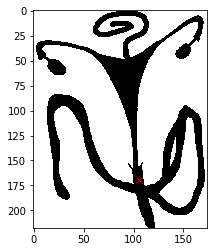

In [12]:
plt.imshow(im.T, cmap=plt.cm.gray)
plt.plot(start[0], start[1], 'rx')

In [5]:
neighbors = np.array([(-1,0), (0,-1), (1,0), (0,1)])

def dijkstra(map, start, callback=None):
    import copy
    #map = map.T
    cost = np.infty * np.ones(map.shape)
    print('cost', cost.shape)
    open_set = [start]
    cost[start] = 0
    count = 0
    evals = 0
    
    def boundary(*pos):
        return max(0, min(im.shape[0]-1, pos[0])), max(0, min(im.shape[1]-1, pos[1]))

    while 0 < len(open_set):
        best = np.inf
        #print("starting search best: {} in {}".format(best, (open_set)))
        for n in open_set:
            #print('csst {}: {}'.format(n, cost[n]))
            if cost[n] < best:
                best = cost[n]
                node = n
        open_set.remove(node)

        for n in neighbors:
            next_node = (node[0] + n[0], node[1] + n[1])
            #print('next_node: ', next_node)
            if (0 <= next_node[0] and next_node[0] < cost.shape[0] and
                0 <= next_node[1] and next_node[1] < cost.shape[1] and
                map[next_node] == 0 and
                cost[next_node] == np.inf):

                left = boundary(next_node[0] - 1, next_node[1])
                right = boundary(next_node[0] + 1, next_node[1])
                up = boundary(next_node[0], next_node[1] - 1)
                down = boundary(next_node[0], next_node[1] + 1)
                #print("ltrb: {}, {}, {}, {}".format(left, up, right, down))
                dx = min(cost[left], cost[right])
                dy = min(cost[up], cost[down])

                if False:
                    nextDist = min(dx, dy) + 1
                elif dx != np.inf and dy != np.inf:
                    #print('land me')
                    delta = 2. - (dx - dy) ** 2
                    nextDist = (dx + dy + np.sqrt(delta)) / 2
                elif dx != np.inf:
                    #print('land me please')
                    nextDist = dx + 1
                elif dy != np.inf:
                    nextDist = dy + 1
                else:
                    nextDist = 0
                #print('next_node: {}, dist: {}, delta: {}'.format(next_node, nextDist, 0))

                cost[next_node] = nextDist
                open_set.append(next_node)
                evals += 1

        if callback is not None and count % 100 == 0:
            cost_show = np.array(cost)
            cost_show[cost_show == np.inf] = 0
            callback(cost_show, open_set)
            #print("calling {}: {},  m {}".format(count, len(open_set), max([cost[n] for n in open_set])))
        #if 100 < count:
        #    break
        count += 1
    return cost, count

cost (174, 218)
9298
Wall time: 249 ms


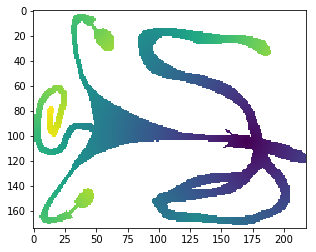

In [13]:
%%time
cost_hist = []
open_hist = []

def callback(cost, open_set):
    cost_hist.append(cost)
    open_hist.append(np.array(open_set))

imcost, count = dijkstra(im, start, callback)
print(count)
plt.imshow(imcost)

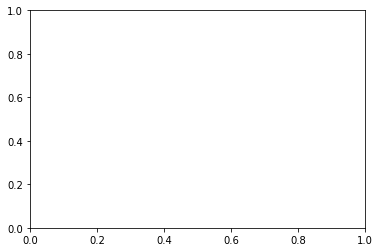

In [14]:
%matplotlib inline
import sys

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

# initialization function: plot the background of each frame
def init():
    return ()

# animation function. This is called sequentially
def animate(i):
    ax.clear()
    im2 = np.stack([np.array(cost_hist[i], dtype=float),
                    np.zeros(im.shape, dtype=float), np.zeros(im.shape, dtype=float)], axis=2)
    #print(im2.shape)
    im2[open_hist[i][:,0], open_hist[i][:,1], :] = np.max(cost_hist[i])
    ax.imshow(im2 / np.max(im2), cmap=plt.cm.gray)
    ax.axis('equal')
    sys.stdout.write('.')
    sys.stdout.flush()
    return ()

# call the animator. blit=True means only re-draw the parts that 
# have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(cost_hist), interval=20, blit=True)

## Save to Gif (requires ImageMagick installed)

In [16]:
anim.save('dijkstra.gif', writer='imagemagick', fps=20)

# Image(url='animation.gif')

MovieWriter imagemagick unavailable.


.............................................................................................

# Showing GIF

![image](dijkstra.gif)


## Save to MP4 (requires ffmpeg, which comes with ImageMagick installer on Windows)

In [15]:
#mywriter = animation.FFMpegWriter(fps=30)
#anim.save('dijkstra.flv', writer=mywriter)
anim.save('dijkstra.mp4', writer='ffmpeg')

.............................................................................................

# Showing mp4

![movie](dijkstra.mp4)